# Python _Object Oriented Programming_ - _Well formed type_

* Krzysztof Molenda, 2023.04.05

W ramach niniejszego popracowania dowiesz się, w jaki sposób podejść do poprawnego i pełnego definiowania własnego typu danych w Pythonie. Zakres opracowania obejmuje:
* definiowanie klasy
* określanie atrybutów klasy i obiektów, definiowanie właściwości
* definiowanie sposobów tworzenia instancji klasy (obiektów)
* dostarczanie mechanizmów tekstowej reprezentacji obiektów
* definiowanie metod instancji i metod klasy (statycznych)
* definiowanie równości dla projektowanego typy
* dokumentowanie kodu

---


Python jest językiem w pełni obiektowym. Oznacza to, że wszystkie byty programu są obiektami. Zmienne Pythona są obiektami, funkcje są obiektami, klasy są obiektami, moduły są obiektami, a nawet całe programy są obiektami.

Na przykład liczba całkowita `10` jest obiektem - obiekt ten jest wskazywany przez zmienną o określonej przez programiście nazwie (np. `x`). Podobnie, napis jest obiektem (złożonym z sekwencji znaków), zaś lista jest obiektem będącym sekwencją innych obiektów.

Obiekty są określonego typu. Typ określa kontekst użycia obiektu, w szczególności jakie operacje można na obiekcie wykonywać. i tak liczba całkowita `10` jest obiektem typu `int`, napis `"Hello"` jest obiektem typu `str`, a lista `[1, 2, 3]` jest obiektem typu `list`.

Obiekt jest bytem programistycznym określonego **typu**, który posiada określony **stan**, **zachowanie** oraz **jednoznaczną identyfikację**.

* **Stan** - obiekt posiada określony stan, który może się zmieniać w czasie działania programu, lub być niezmienny. Stan obiektu jest określony przez wartości jego atrybutów. Jeśli stan ulega zmianie, obiekt nazywamy **mutowalnym**. W przeciwnym wypadku obiekt jest **niezmienialny**. W Pythonie obiekty typu `int`, `float`, `bool`, `str`, `tuple`, `frozenset`, `bytes` czy `range` są niezmienne, tzn. po utworzeniu ich stan nie ulega zmianie. Na przykład atrybutem obiektu typu `str` jest sekwencja znaków (zapamiętana wewnętrznie), dostępna z poziomu zmiennej (np. po przypisaniu `s = "Ala ma kota"` odwołanie do zmiennej `s` zwraca ten obiekt, zaś odwołanie do `s[1]` zwraca znak `l`).

* **Zachowanie** - obiekt posiada określone zachowanie, które definiuje jakie operacje można na nim wykonywać. Zachowanie obiektu jest opisane przez jego metody, czyli funkcje, które są przypisane do niego (nazywane _metodami instancji_). Na przykład obiekt typu `str` posiada metodę instancji `isalpha()`, która zwraca wartość `True` jeśli wszystkie znaki w napisie są literami, a `False` w przeciwnym wypadku. Metody instancji są wywoływane przez operator _wyłuskania_ `.` na rzecz obiektu. Na przykład `s.isalpha()` wywołuje metodę `isalpha()` obiektu `s`. Innym przykładem metody instancji jest `s.upper()`, która zwraca nowy obiekt typu `str` złożony z wielkich liter, zbudowany na bazie obiektu `s`.

* **Jednoznaczna identyfikacja** - każdy obiekt posiada jednoznaczny identyfikator, który jest unikalny w obrębie programu. W Pythonie identyfikator obiektu możemy uzyskać za pomocą funkcji wbudowanej `id()`. Na przykład `id("Ala ma kota")` zwraca w moim środowisku identyfikator obiektu `1935614773424` - przy czym wartość ta będzie zmieniać się w kolejnych uruchomieniach oraz będzie różna w różnych środowiskach.

* **Typ** - typ obiektu określa kontekst jego użycia i jest potrzebny do analizy poprawności wykonania określonych operacji na obiekcie lub przy udziale obiektu. W Pythonie taka weryfikacja odbywa się podczas uruchomienia (wykonania instrukcji programu). Typ opisywany jest za pomocą konstrukcji definiowania klasy (`class`) - określając atrybuty i metody instancji, ale również atrybuty i metody klasowe - dostępne dla typu (i wszystkich możliwych jego instancji). Na przykład typ `str` posiada atrybut klasowy `__name__` o wartości `"str"` (czyli opisujący jego nazwę) oraz metody klasy. 

## Definiowanie klas

Definiowanie klas w Pythonie odbywa się za pomocą konstrukcji `class`. W toku niniejszego opracowania zaprojektujemy klasę `Osoba` opisującą osobę - jej imię, nazwisko, datę urodzenia - poznając zasady definiowania typów w Pythonie.

Zaczniemy od definicji klasy `Osoba`, bez żadnych danych i metod:

In [1]:
class Osoba:
    pass
# koniec definicji klasy

# testowanie klasy
osoba1 = Osoba()
print(osoba1)
print(id(osoba1))

2204174707248


Klasa ta jest mało ciekawa, ponieważ nie posiada żadnych danych i metod. Można jednak utworzyć obiekt klasy `Osoba`, jest on zlokalizowany w pamięci pod określonym adresem, który możemy uzyskać za pomocą funkcji `id()`.

Uzupełniamy klasę o atrybuty `imie`, `nazwisko` oraz `data_urodzenia` będące atrybutami (zmiennymi) instancji. W tym celu musimy zdefiniować metodę `__init__` (metodę inicjalizującą, konstruktor), która jest wywoływana podczas tworzenia nowego obiektu klasy `Osoba`.

In [2]:
from datetime import date

class Osoba:
    # konstruktor
    def __init__(self, imie: str, nazwisko: str, data_urodzenia: date) -> None:
        self.imie = imie.capitalize()           # atrybut instancji
        self.nazwisko = nazwisko.capitalize()   # atrybut instancji
        self.data_urodzenia = data_urodzenia    # atrybut instancji
# koniec definicji klasy

osoba1 = Osoba("Jan", "Kowalski", date(1990, 1, 1))
print(osoba1)
print(osoba1.imie, osoba1.nazwisko, osoba1.data_urodzenia)

Jan Kowalski 1990-01-01


### Konstruktor, inicjalizator (`__init__`)

W Pythonie konstruktor ma specjalną nazwę i zapis (`__init__`) -- słowo `init` z prefiksem i sufiksem dwóch znaków podkreślenia `__`. Jest on wywoływany podczas tworzenia obiektu i jego głównym zadaniem jest utworzenie i inicjalizacja atrybutów instancji. W naszym przypadku konstruktor przyjmuje trzy argumenty: `self`, `imie`, `nazwisko` oraz `data_urodzenia`. Argument `self` jest referencją do obiektu, który jest aktualnie tworzony - w naszym przypadku jest to obiekt klasy `Osoba`. Argumenty `imie`, `nazwisko` oraz `data_urodzenia` są przekazywane do konstruktora podczas tworzenia obiektu. Wewnątrz konstruktora przypisujemy wartości tych argumentów do atrybutów instancji `self.imie`, `self.nazwisko` oraz `self.data_urodzenia`.

W przeciwieństwie do innych obiektowych języków programowania, w Pythonie atrybutów instancji nie definiuje się wewnątrz definicji klasy a wewnątrz konstruktora. W Pythonie atrybuty instancji są bowiem tworzone w momencie tworzenia obiektu, a nie w momencie utworzenia klasy (w momencie tworzenia klasy tworzone są atrybuty klasy, statyczne składniki). Ponieważ Python jest językiem dynamicznie typowanym, atrybuty instancji nie muszą być zadeklarowane w konstruktorze, mogą one być dodawane w dowolnym momencie. W tym celu wystarczy przypisać do atrybutu instancji wartość. Na przykład:

```python
osoba = Osoba("Jan", "Kowalski", "1970-01-01")
osoba.wzrost = 180
```

W powyższym przykładzie utworzony został obiekt klasy `Osoba` i referencja do niego zapamiętana została w zmiennej `osoba`. Do tego obiektu dodano atrybut instancji o nazwie `wzrost`, przypisując mu wartość `180`. Atrybut ten nie był zadeklarowany w konstruktorze, ale został utworzony w momencie przypisania do niego wartości.

Nie oznacza to jednak, że kolejne utworzone osoby będą tym atrybutem dysponować. Atrybuty instancji są tworzone w momencie tworzenia obiektu (konstruktor), a nie w momencie tworzenia klasy. Przedstawia to 
[wizualizacja](https://pythontutor.com/visualize.html#code=from%20datetime%20import%20date%0A%0Aclass%20Osoba%3A%0A%20%20%20%20%23%20konstruktor%0A%20%20%20%20def%20__init__%28self,%20imie%3A%20str,%20nazwisko%3A%20str,%20data_urodzenia%3A%20date%29%20-%3E%20None%3A%0A%20%20%20%20%20%20%20%20self.imie%20%3D%20imie.capitalize%28%29%20%20%20%20%20%20%20%20%20%20%20%23%20atrybut%20instancji%0A%20%20%20%20%20%20%20%20self.nazwisko%20%3D%20nazwisko.capitalize%28%29%20%20%20%23%20atrybut%20instancji%0A%20%20%20%20%20%20%20%20self.data_urodzenia%20%3D%20data_urodzenia%20%20%20%20%23%20atrybut%20instancji%0A%23%20koniec%20definicji%20klasy%0A%0Aosoba1%20%3D%20Osoba%28%22Jan%22,%20%22Kowalski%22,%20date%281990,%201,%201%29%29%0Aosoba1.wzrost%20%3D%20180%0A%0Aosoba2%20%3D%20Osoba%28%22Anna%22,%20%22Nowak%22,%20%221980-01-01%22%29%0Aprint%28osoba2.wzrost%29&cumulative=false&curInstr=16&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false).

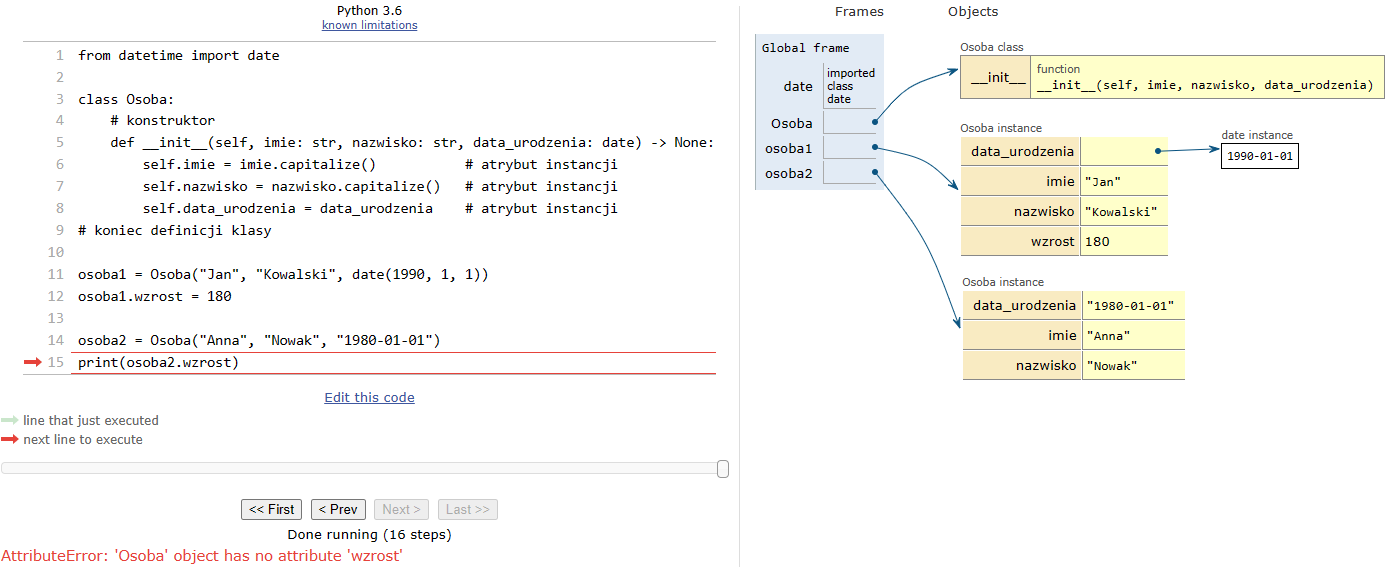

### Dodawanie atrybutów instancji

W naszym przykładzie nie musielibyśmy definiować konstruktora. Ten sam efekt uzyskamy, jeśli zdefiniujemy pustą klasę `Osoba` i dla instancji tej klasy przypiszemy atrybuty:

```python
from datetime import date

class Osoba:
    pass

osoba1 = Osoba()
osoba1.imie = "Jan"
osoba1.nazwisko = "Kowalski"
osoba1.data_urodzenia = date(1990, 1, 1)
```

Rezygnujemy jednak z szablonu, jaki definiuje klasa `Osoba` opisująca później tworzone obiekty według tej samej zasady. 

### Usuwanie atrybutów instancji

Skoro do instancji klasy (do obiektu) można dodawać atrybuty nawet po jej zainicjowaniu, to można też je dynamicznie usuwać. W tym celu używa się operatora `del`:

```python
del osoba.nazwisko
```

W powyższym przykładzie usunięto atrybut instancji `nazwisko` z obiektu `osoba`. Atrybut ten był zadeklarowany w konstruktorze, ale został usunięty w momencie wykonania operatora `del`. Próba odwołania się do usuniętego atrybutu z obiektu `osoba` spowoduje błąd:

```python
print(osoba.nazwisko)
```

```output
Traceback (most recent call last):
  File "main.py", line 1, in <module>
    print(osoba.nazwisko)
AttributeError: 'Osoba' object has no attribute 'nazwisko'
```

Oczywiście operator `del` w tym przypadku nie usuwa atrybutu `nazwisko` z klasy `Osoba`, tylko z obiektu `osoba`. Utworzenie nowej osoby przy użyciu konstruktora spowoduje, że atrybut `nazwisko` będzie znowu dostępny:

```python
osoba = Osoba("Jan", "Kowalski", "1970-01-01")
print(osoba.nazwisko)   # wypisze Kowalski
del osoba.nazwisko
print(osoba.nazwisko)   # spowoduje błąd
osoba1 = Osoba("Anna", "Nowak", "1980-01-01")
print(osoba1.nazwisko)  # wypisze Nowak
```

> :warning: Operator `del` w Pythonie służy generalnie do usuwania obiektów (wszystko - klasy, składniki klas, funkcje, ... - jest obiektem) z pamięci operacyjnej programu. Zmienne wskazujące na te obiekty są zgłaszane mechanizmowi odśmiecania (_garbage collection_) jako przeznaczone do usunięcia.

### Konstruktor bezparametrowy i z parametrami

W Pythonie rozróżniamy dwa rodzaje konstruktorów (stosowane w zależności od potrzeb):

* konstruktor bezparametrowy - którego rolą jest domyślna inicjalizacja atrybutów instancji
* konstruktor z parametrami - który przyjmuje parametry i na ich podstawie inicjalizuje atrybuty instancji

W przypadku klasy `Osoba` moglibyśmy zdefiniować konstruktor bezparametrowy (który z formalnych względów przyjmowałby tylko parametr `self`):

```python
class Osoba:
    def __init__(self):
        self.imie = ""
        self.nazwisko = ""
        self.data_urodzenia = None
```

W powyższym przykładzie konstruktor bezparametrowy inicjalizuje atrybuty instancji na wartości domyślne. W tym przypadku wartości domyślne to pusty napis `""` dla atrybutów `imie` i `nazwisko` oraz wartość `None` (brak danych) dla atrybutu `data_urodzenia`. Atrybuty te mogą być później nadpisane przez użytkownika:

```python
osoba = Osoba()
osoba.imie = "Jan"
osoba.nazwisko = "Kowalski"
osoba.data_urodzenia = date(1990, 1, 1)
```

Ponieważ w Pythonie **nie ma przeciążania nazw** metod, więc **konstruktor może być tylko jeden**. Formalnie moglibyśmy zapisać dwa, ale wtedy drugi z nich (późniejszy w kodzie) nadpisałby ten pierwszy (i cały wysiłek poszedłby na marne):
    
```python
class Osoba:
    def __init__(self):
        self.imie = ""
        self.nazwisko = ""
        self.data_urodzenia = None

    def __init__(self, imie, nazwisko, data_urodzenia):
        self.imie = imie
        self.nazwisko = nazwisko
        self.data_urodzenia = data_urodzenia

osoba = Osoba() # spowoduje błąd
osoba = Osoba("Jan", "Kowalski", "1990-01-01") # poprawnie
```

Rozwiązaniem dla takiego wariantowania konstruktorów jest użycie _parametrów opcjonalnych_ dla metod:

```python
class Osoba:
    def __init__(self, imie="", nazwisko="", data_urodzenia=None):
        self.imie = imie
        self.nazwisko = nazwisko
        self.data_urodzenia = data_urodzenia
```

W powyższym przykładzie konstruktor przyjmuje trzy parametry, ale każdy z nich ma określoną wartość domyślną. W ten sposób możemy wywołać konstruktor bez parametrów, albo z jednym, dwoma lub trzema parametrami (oczywiście `self` na pierwszej pozycji pozostaje):

```python
osoba = Osoba()                                # poprawnie
osoba = Osoba("Jan")                           # poprawnie
osoba = Osoba("Jan", "Kowalski")               # poprawnie
osoba = Osoba("Jan", "Kowalski", "1990-01-01") # poprawnie
osoba = Osoba(data_urodzenia="1990-01-01", nazwisko="Nowak")     # poprawnie
```

Często spotykaną sytuacją jest definiowanie konstruktora ze zmienną i nieokreśloną liczbą parametrów. W tym celu używa się operatora `**` i notacji `**kwargs` (formalnie przekazujemy konstruktorowi słownik, czyli pary klucz-wartość, gdzie kluczem jest nazwa parametru, a wartością jego wartość):

```python
class Osoba:
    def __init__(self, imie="", nazwisko="", **kwargs):
        self.imie = imie
        self.nazwisko = nazwisko
        self.data_urodzenia = kwargs.get("data_urodzenia")
        self.wzrost = kwargs.get("wzrost")
```

Użycie metody `get()` na słowniku `kwargs` pozwala na pobranie wartości z klucza `data_urodzenia` lub `wzrost` nawet, jeśli nie istnieją (zwracana jest wtedy wartość `None`). Zastosowanie odwołania bezpośredniego, indeksowanego, np. `kwargs["wzrost"]` spowoduje błąd, jeśli klucza `wzrost` nie będzie na liście argumentów (w słowniku `kwargs`).

Można podejść bardzo ogólnie i przetwarzać słownik w pętli (wykorzystując globalną funkcję `setattr()`):

In [3]:
from datetime import date

class Osoba:
    def __init__(self, imie="", nazwisko="", **kwargs):
        self.imie = imie
        self.nazwisko = nazwisko
        for key, value in kwargs.items():
            setattr(self, key, value)
# koniec definicji klasy

osoba1 = Osoba("Jan", "Kowalski", data_urodzenia = date(1990, 1, 1), wzrost = 160, pensja = 3000)
print(osoba1.imie, osoba1.nazwisko, osoba1.data_urodzenia, osoba1.wzrost, osoba1.pensja)

Jan Kowalski 1990-01-01 160 3000


## Definiowanie metod instancji

Opracowana do tej pory definicja klasy zawiera tylko konstruktor, tworzący atrybuty instancji. Chcemy teraz uzupełnić tę definicję o metody instancji, czyli funkcje, które będą wykonywać operacje na atrybutach i obiektach klasy `Osoba`. Przydatną metodą będzie np. metoda `wiek()`, która zwróci wiek osoby na podstawie zapamiętanej jej daty urodzenia:

```python
class Osoba:
    def __init__(self, imie="", nazwisko="", data_urodzenia=None):
        self.imie = imie
        self.nazwisko = nazwisko
        self.data_urodzenia = data_urodzenia

    def wiek(self):
        if self.data_urodzenia is None:
            return None
        else:
            return date.today().year - self.data_urodzenia.year
```

W powyższym przykładzie metoda `wiek()` zwraca wiek osoby na podstawie daty urodzenia. Jeśli data urodzenia nie jest określona, to zwracana jest wartość `None`. W tym celu wykorzystano operator `is` (porównanie identyczności obiektów), który zwraca `True` tylko wtedy, gdy obiekty są identyczne (w tym przypadku `None` jest jedynym obiektem o wartości `None`).

Poniżej przestawiono skompresowaną wersję tego kodu, w której wykorzystano operator warunkowy `if`:

```python
class Osoba:
    ...

    def wiek(self):
        return None if self.data_urodzenia is None else date.today().year - self.data_urodzenia.year
```

> **Dygresja**: formalnie, podane powyżej obliczanie wieku osoby nie jest poprawne, bowiem bierzemy pod uwagę tylko pełne lata (obliczamy _rocznikowo_). W rzeczywistości należy uwzględnić datę urodzin. Skoryguj samodzielnie ten błąd.

In [4]:
from datetime import date

class Osoba:
    def __init__(self, imie="", nazwisko="", data_urodzenia=None):
        self.imie = imie
        self.nazwisko = nazwisko
        self.data_urodzenia = data_urodzenia

    # metody instancji
    def wiek(self) -> int:
        """Zwraca wiek osoby w latach, jeśli podano datę urodzenia, w przeciwnym wypadku zwraca None"""
        return date.today().year - self.data_urodzenia.year if self.data_urodzenia else None

    def imie_i_nazwisko(self) -> str:
        return f'{self.imie} {self.nazwisko}' if self.imie and self.nazwisko else None     
# koniec definicji klasy

osoba1 = Osoba("Jan", "Kowalski", data_urodzenia = date(1990, 1, 1))
print(osoba1.wiek())      # wywołanie metody instancji
print(Osoba.wiek(osoba1)) # wywołanie metody instancji jako funkcji klasy (z przekazaniem instancji jako argumentu)

osoba2 = Osoba("Jan", "Kowalski") # nie podano daty urodzenia
print(osoba2.wiek())              # wynik: `None`
print(osoba2.imie_i_nazwisko() + " ma " + str(osoba2.wiek()) + " lat(a)")

33
33
None
Jan Kowalski ma None lat(a)


## Atrybuty i metody klasy (statyczne)

Do tego momentu, opisując proces definiowania klasy, skoncentrowani byliśmy na składnikach instancji: atrybutach i metodach instancji. W Pythonie istnieją jednak także _składniki klasy_, czyli atrybuty i metody, które są wspólne dla wszystkich instancji danej klasy. Dostęp do tych elementów odbywa się poprzez podanie nazwy klasy, później operatora wyłuskania (kropki), a następnie nazwy składnika.

Rozbudujmy nasz przykład o atrybut klasy `wiek_pelnoletnosci`, który będzie określał wiek, od którego osoba jest uważana za pełnoletnią. Dodatkowo, zdefiniujmy _metodę instancji_ `jest_pelnoletnia()`, która sprawdzi, czy osoba jest pełnoletnia, na podstawie zapamiętanej daty urodzenia oraz atrybutu klasy `wiek_pelnoletnosci`:

```python
class Osoba:    
    wiek_pelnoletnosci = 18 # atrybut klasy, wspólny dla wszystkich instancji

    def __init__(self, imie="", nazwisko="", data_urodzenia=None):
        ...

    def wiek(self):
        ...

    def jest_pelnoletnia(self) -> bool:
        """
        Sprawdza, czy osoba jest pełnoletnia, na podstawie zapamiętanej daty urodzenia.
        Jeśli data urodzenia nie jest określona, to zwracana jest wartość `False`.
        """
        return self.wiek() >= Osoba.wiek_pelnoletnosci if self.data_urodzenia is not None else False
```

> **Dygresja**: Gdyby naszą intencją było zdefiniowanie stałej określającej wiek pełnoletności, to zgodnie z konwencją nazewnictwa stałych w Pythonie, powinniśmy ją nazwać `WIEK_PELNOLETNOSCI` (wielkimi literami). Python nie wspiera koncepcji stałych (czyli zmiennych, których wartość nie może zostać zmieniona w toku działania programu).

Warto zwrócić uwagę na dostęp do _atrybutu klasy_ - należy poprzedzić go nazwą klasy, np. `Osoba.wiek_pelnoletnosci`. Atrybut ten jest jeden, wspólny dla wszystkich instancji, zdefiniowany dla klasy. Jeśli zmienilibyśmy wartość tego atrybutu, to od tego momentu zmiana ta miałaby wpływ na wszystkie instancje klasy.

_Metody klasy_ to metody zdefiniowane dla klasy, nie wymagające istnienia jakiejkolwiek instancji. Ich definiowanie jest bardzo podobne do definiowania metod instancji, z tą różnicą, że nie otrzymują one parametru `self` na pierwszej pozycji, tylko parametr o nazwie `cls`. Dodatkowo, takie metody klasy oznaczamy adnotacją `@classmethod` bezpośrednio nad definiowanym elementem.

> _Metody klasy_ nie mogą korzystać z _atrybutów i metod instancji_.

Utworzymy _metodę klasy_ `czy_pelnoletnia()`, która sprawdzi, czy osoba jest pełnoletnia, na podstawie podanego wieku (liczba całkowita) oraz atrybutu klasy `wiek_pelnoletnosci`:

```python
class Osoba:
    wiek_pelnoletnosci = 18 # atrybut klasy, wspólny dla wszystkich instancji

    ...

    @classmethod
    def czy_pelnoletnia(cls, wiek: int) -> bool:
        """
        Sprawdza, czy osoba jest pełnoletnia, na podstawie podanego wieku.
        """
        return wiek >= cls.wiek_pelnoletnosci
```

Metoda ta nie zmienia stanu klasy ani instancji, tylko odczytuje wartość przypisaną do atrybutu klasy `wiek_pelnoletnosci`.

Utworzymy jeszcze jedną metodę klasy, która modyfikuje informację o pełnoletności. Zdefiniujmy _metodę klasy_ `ustaw_wiek_pelnoletnosci()`, która zmieni wartość atrybutu klasy `wiek_pelnoletnosci` na podaną wartość w parametrze `wiek`, lub na wartość domyślną `18` jeśli nic nie podano, lub gdy podano wartość mniejszą od `0` nic nie zmieniając:

```python
class Osoba:
    wiek_pelnoletnosci = 18 # atrybut klasy, wspólny dla wszystkich instancji

    ...

    @classmethod
    def ustaw_wiek_pelnoletnosci(cls, wiek: int = 18) -> None:
        """
        Ustawia `wiek_pelnoletnosci` na podaną wartość, lub domyślnie na 18.
        Jeśli podana wartość jest mniejsza od 0, to nie zmienia wartości atrybutu.
        """
        if wiek >= 0: cls.wiek_pelnoletnosci = wiek
```

W tym przypadku metoda modyfikuje stan klasy.

In [5]:
from datetime import date

# definiowanie klasy Osoba ==================
class Osoba:    
    wiek_pelnoletnosci = 18                     # atrybuty klasy
    
    def __init__(self, imie="", nazwisko="", data_urodzenia=None):
        self.imie = imie
        self.nazwisko = nazwisko
        self.data_urodzenia = data_urodzenia

    # metody instancji
    def wiek(self) -> int:
        """Zwraca wiek osoby w latach, jeśli podano datę urodzenia, w przeciwnym wypadku zwraca None"""
        return date.today().year - self.data_urodzenia.year if self.data_urodzenia else None

    def imie_i_nazwisko(self) -> str:
        return f'{self.imie} {self.nazwisko}' if self.imie and self.nazwisko else None
    
    def jest_pelnoletnia(self) -> bool:
        """
        Sprawdza, czy osoba jest pełnoletnia, na podstawie zapamiętanej daty urodzenia.
        Jeśli data urodzenia nie jest określona, to zwracana jest wartość `False`.
        """
        return self.wiek() >= Osoba.wiek_pelnoletnosci if self.data_urodzenia is not None else False

    # metody klasy
    @classmethod
    def czy_pelnoletnia(cls, wiek: int) -> bool:
        """
        Sprawdza, czy osoba jest pełnoletnia, na podstawie podanego wieku.
        """
        return wiek >= cls.wiek_pelnoletnosci
    
    @classmethod
    def ustaw_wiek_pelnoletnosci(cls, wiek: int = 18) -> None:
        """
        Ustawia wiek pełnoletności na podaną wartość, lub domyślnie na 18.
        Jeśli podana wartość jest mniejsza od 0, to nie zmienia wartości atrybutu.
        """
        if wiek >= 0: cls.wiek_pelnoletnosci = wiek

# koniec definicji klasy

# testy ==================
km = Osoba('Krzysztof', 'Molenda', date(2000, 1, 1))
km1 = Osoba("Jan", "Kowalski", date(2010, 1, 1))

print("Wiek pełnoletności:", Osoba.wiek_pelnoletnosci, "lat")
print(f"{km.imie_i_nazwisko()} ma {km.wiek()} lat i {'jest' if km.jest_pelnoletnia() else 'nie jest'} pełnoletni(a).")
print(f"{km1.imie_i_nazwisko()} ma {km1.wiek()} lat i {'jest' if km1.jest_pelnoletnia() else 'nie jest'} pełnoletni(a).")

# zmiana wieku pełnoletności
Osoba.wiek_pelnoletnosci = 26
print("Wiek pełnoletności:", Osoba.wiek_pelnoletnosci, "lat")
print(f"{km.imie_i_nazwisko()} ma {km.wiek()} lat i {'jest' if km.jest_pelnoletnia() else 'nie jest'} pełnoletni(a).")
print(f"{km1.imie_i_nazwisko()} ma {km1.wiek()} lat i {'jest' if km1.jest_pelnoletnia() else 'nie jest'} pełnoletni(a).")

# sprawdzenie metody klasy
print(f"Osoba o wieku 20 lat {'jest' if Osoba.czy_pelnoletnia(20) else 'nie jest'} pełnoletnia.")
Osoba.ustaw_wiek_pelnoletnosci() # domyślnie 18 lat
print(f"Osoba o wieku 20 lat {'jest' if Osoba.czy_pelnoletnia(20) else 'nie jest'} pełnoletnia.")

Wiek pełnoletności: 18 lat
Krzysztof Molenda ma 23 lat i jest pełnoletni(a).
Jan Kowalski ma 13 lat i nie jest pełnoletni(a).
Wiek pełnoletności: 26 lat
Krzysztof Molenda ma 23 lat i nie jest pełnoletni(a).
Jan Kowalski ma 13 lat i nie jest pełnoletni(a).
Osoba o wieku 20 lat nie jest pełnoletnia.
Osoba o wieku 20 lat jest pełnoletnia.


Częstym przykładem wykorzystania metod klasy jest implementacja _metody fabrykującej_ (ang. _factory method_). Metoda ta jest odpowiedzialna za tworzenie instancji klasy. Już wiemy, że do tworzenia obiektu wywołujemy konstruktor klasy, czyli metodę `__init__()` z podaną listą parametrów. Czasami jednak chcemy _sfabrykować_ obiekt na podstawie innego zestawu parametrów, niż te, które są wymagane do utworzenia obiektu w konstruktorze.

Do przykładu klasy `Osoba` dodamy metodę fabrykującą obiekt tej klasy na podstawie napisu zawierającego imię, nazwisko i ewentualnie datę urodzenia, np. `"Jan Kowalski"` lub `"Jan Kowalski 1990-01-01"`:

```python
class Osoba:

    ...

    @classmethod
    def utworz_z_napisu(cls, napis: str) -> Osoba:
        """
        Tworzy obiekt klasy `Osoba` na podstawie napisu zawierającego kolejno imię, nazwisko i ewentualnie datę urodzenia,
        oddzielone pojedynczą spacją. Zakładamy poprawność wprowadzonych danych, format daty: YYYY-MM-DD.
        """
        lista = napis.split(" ")
        if len(lista) < 2:
            raise ValueError("Napis musi zawierać przynajmniej imię i nazwisko.")
        
        imie, nazwisko = lista[0], lista[1]        
        data_urodzenia = None
        if len(lista) > 2:
            data_urodzenia = datetime.strptime(lista[2], '%Y-%m-%d').date()
        
        return cls(imie, nazwisko, data_urodzenia)
```

Jest to metoda klasy (dekoracja `@classmethod` oraz parametr `cls`), parsuje przekazany napis (metoda `split()`) a następnie fragmenty napisu przekazuje do konstruktora klasy wywoływanego przez `cls()` - ostatnia linia z `return`. Do konwersji napisu na datę użyliśmy funkcji `datetime.strptime()` z modułu `datetime`.

In [6]:
from datetime import date
from datetime import datetime

# definiowanie klasy Osoba ==================
class Osoba:    
    wiek_pelnoletnosci = 18                     # atrybuty klasy
    
    def __init__(self, imie="", nazwisko="", data_urodzenia=None):
        self.imie = imie
        self.nazwisko = nazwisko
        self.data_urodzenia = data_urodzenia

    # metody instancji
    def wiek(self) -> int:
        """Zwraca wiek osoby w latach, jeśli podano datę urodzenia, w przeciwnym wypadku zwraca None"""
        return date.today().year - self.data_urodzenia.year if self.data_urodzenia else None

    def imie_i_nazwisko(self) -> str:
        return f'{self.imie} {self.nazwisko}' if self.imie and self.nazwisko else None
    
    def jest_pelnoletnia(self) -> bool:
        """
        Sprawdza, czy osoba jest pełnoletnia, na podstawie zapamiętanej daty urodzenia.
        Jeśli data urodzenia nie jest określona, to zwracana jest wartość `False`.
        """
        return self.wiek() >= Osoba.wiek_pelnoletnosci if self.data_urodzenia is not None else False

    # metody klasy
    @classmethod
    def czy_pelnoletnia(cls, wiek: int) -> bool:
        """
        Sprawdza, czy osoba jest pełnoletnia, na podstawie podanego wieku.
        """
        return wiek >= cls.wiek_pelnoletnosci
    
    @classmethod
    def ustaw_wiek_pelnoletnosci(cls, wiek: int = 18) -> None:
        """
        Ustawia wiek pełnoletności na podaną wartość, lub domyślnie na 18.
        Jeśli podana wartość jest mniejsza od 0, to nie zmienia wartości atrybutu.
        """
        if wiek >= 0: cls.wiek_pelnoletnosci = wiek

    @classmethod
    def utworz_z_napisu(cls, napis: str) -> Osoba:
        """
        Tworzy obiekt klasy `Osoba` na podstawie napisu zawierającego kolejno imię, nazwisko i ewentualnie datę urodzenia,
        oddzielone pojedynczą spacją. Zakładamy poprawność wprowadzonych danych, format daty: YYYY-MM-DD.
        """
        lista = napis.split(" ")
        if len(lista) < 2:
            raise ValueError("Napis musi zawierać przynajmniej imię i nazwisko.")
        
        imie, nazwisko = lista[0], lista[1]        
        data_urodzenia = None
        if len(lista) > 2:
            data_urodzenia = datetime.strptime(lista[2], '%Y-%m-%d').date()
        
        return cls(imie, nazwisko, data_urodzenia)


# koniec definicji klasy

# testy ==================
km = Osoba.utworz_z_napisu("Krzysztof Molenda 2023-01-01")
print(km.imie_i_nazwisko(), km.data_urodzenia)
km1 = Osoba.utworz_z_napisu("Jan Kowalski")
print(km1.imie_i_nazwisko(), km1.data_urodzenia)

Krzysztof Molenda 2023-01-01
Jan Kowalski None


W języku Python istnieje jeszcze jeden rodzaj metod, które nie są ani metodami instancji, ani metodami klasy. Są to _metody statyczne_ (ang. _static methods_). Są one zdefiniowane w ten sam sposób, jak metody klasy, z tą różnicą, że nie otrzymują parametru `cls` na pierwszej pozycji, a także oznaczamy je adnotacją `@staticmethod`. Metody statyczne nie mogą korzystać z _atrybutów i metod instancji_ i nie mogą zmieniać stanu klasy. Są to metody, które nie wymagają żadnych informacji o klasie, ani o instancji, z której zostały wywołane - zatem mogą pełnić rolę metod pomocniczych, narzędziowych (_helpers_).

Przykładem takiej metody może być metoda `napis_na_date_urodzenia(napis : str) -> date`, która sprawdzi, czy podana data urodzenia jest poprawna, czyli czy jest poprawnie sformatowana oraz czy jest to data z przeszłości, a nie z przyszłości, a następnie zwróci obiekt klasy `date` z modułu `datetime`. W przypadku niepowodzenia zwróci `None`:

```python
class Osoba:

    ...

    @staticmethod
    def napis_na_date_urodzenia(napis: str) -> date:
        """
        Sprawdza, czy podany napis jest poprawną datą urodzenia, czyli czy jest poprawnie sformatowany
        oraz czy jest to data z przeszłości, a nie z przyszłości. W przypadku powodzenia zwraca obiekt klasy `date`
        z modułu `datetime`, w przypadku niepowodzenia zwraca `None`.
        """
        try:
            data = datetime.strptime(napis, '%Y-%m-%d').date()
            if data > date.today():
                return None
            return data
        except ValueError:
            return None
```

Kod tej metody możemy używać zarówno w klasie `Osoba`, jak i w innych klasach, nie musimy tworzyć instancji klasy `Osoba` ani nie musimy korzystać z żadnych atrybutów ani metod tej klasy.

In [7]:
from datetime import date
from datetime import datetime

# definiowanie klasy Osoba ==================
class Osoba:    
    wiek_pelnoletnosci = 18                     # atrybuty klasy
    
    def __init__(self, imie="", nazwisko="", data_urodzenia=None):
        self.imie = imie
        self.nazwisko = nazwisko
        self.data_urodzenia = data_urodzenia

    # metody instancji
    def wiek(self) -> int:
        """Zwraca wiek osoby w latach, jeśli podano datę urodzenia, w przeciwnym wypadku zwraca None"""
        return date.today().year - self.data_urodzenia.year if self.data_urodzenia else None

    def imie_i_nazwisko(self) -> str:
        return f'{self.imie} {self.nazwisko}' if self.imie and self.nazwisko else None
    
    def jest_pelnoletnia(self) -> bool:
        """
        Sprawdza, czy osoba jest pełnoletnia, na podstawie zapamiętanej daty urodzenia.
        Jeśli data urodzenia nie jest określona, to zwracana jest wartość `False`.
        """
        return self.wiek() >= Osoba.wiek_pelnoletnosci if self.data_urodzenia is not None else False

    # metody klasy
    @classmethod
    def czy_pelnoletnia(cls, wiek: int) -> bool:
        """
        Sprawdza, czy osoba jest pełnoletnia, na podstawie podanego wieku.
        """
        return wiek >= cls.wiek_pelnoletnosci
    
    @classmethod
    def ustaw_wiek_pelnoletnosci(cls, wiek: int = 18) -> None:
        """
        Ustawia wiek pełnoletności na podaną wartość, lub domyślnie na 18.
        Jeśli podana wartość jest mniejsza od 0, to nie zmienia wartości atrybutu.
        """
        if wiek >= 0: cls.wiek_pelnoletnosci = wiek

    @classmethod
    def utworz_z_napisu(cls, napis: str) -> Osoba:
        """
        Tworzy obiekt klasy `Osoba` na podstawie napisu zawierającego kolejno imię, nazwisko i ewentualnie datę urodzenia,
        oddzielone pojedynczą spacją. Zakładamy poprawność wprowadzonych danych, format daty: YYYY-MM-DD.
        """
        lista = napis.split(" ")
        if len(lista) < 2:
            raise ValueError("Napis musi zawierać przynajmniej imię i nazwisko.")
        
        imie, nazwisko = lista[0], lista[1]        
        data_urodzenia = None
        if len(lista) > 2:
            data_urodzenia = Osoba.napis_na_date_urodzenia(lista[2])
        
        return cls(imie, nazwisko, data_urodzenia)

    @staticmethod
    def napis_na_date_urodzenia(napis: str) -> date:
        """
        Sprawdza, czy podany napis jest poprawną datą urodzenia, czyli czy jest poprawnie sformatowany
        oraz czy jest to data z przeszłości, a nie z przyszłości. W przypadku powodzenia zwraca obiekt klasy `date`
        z modułu `datetime`, w przypadku niepowodzenia zwraca `None`.
        """
        if not napis: return None
        try:
            data = datetime.strptime(napis, '%Y-%m-%d').date()
            if data > date.today():
                return None
            return data
        except ValueError:
            return None

# koniec definicji klasy

# testy ==================
data_ur = Osoba.napis_na_date_urodzenia("2020-01-01")
km2 = Osoba("Jan", "Nowak", data_ur)
print(km2.imie_i_nazwisko(), km2.data_urodzenia)

Jan Nowak 2020-01-01


## Tekstowa reprezentacja obiektu

W obiektowych językach programowania (Java, C#) istnieje konwencja, że każda klasa powinna mieć zaimplementowaną metodę `toString()`, która zwraca tekstową reprezentację obiektu. W Pythonie nie ma takiej konwencji, ale istnieje możliwość zdefiniowania metody `__str__()`, która pełni taką samą rolę. Metoda ta jest wywoływana, gdy wywołujemy funkcję `str()` (jawnie lub niejawnie) na obiekcie danej klasy. Przykład:

```python
class Osoba:
    def __init__(self, imie: str, nazwisko: str, data_urodzenia: date = None):
        self.imie = imie
        self.nazwisko = nazwisko
        self.data_urodzenia = data_urodzenia

    def __str__(self):
        return f"{self.imie} {self.nazwisko} ({self.data_urodzenia})"

km = Osoba("Jan", "Kowalski", date(1990, 1, 1))
print(km)   # niejawne wywołanie funkcji str() na obiekcie klasy Osoba
            # wynik: Jan Kowalski (1990-01-01)
```

W Pythonie mamy dostępne wbudowane funkcje `str()` oraz `repr()`, które zwracają tekstową reprezentację obiektu. Funkcja `str()` zwraca tekstową reprezentację obiektu, która jest przeznaczona do wyświetlenia użytkownikowi, natomiast funkcja `repr()` zwraca tekstową reprezentację obiektu przeznaczoną dla programisty, która może być użyta do utworzenia nowego obiektu tej samej klasy. Działanie tych metod w kontekście projektowanej klasy jest uzależnione od definicji metod `__str__()` i `__repr__()` w samej klasie. Jeśli nie zdefiniujemy żadnej z tych metod, to Python wykorzysta domyślne implementacje tych metod, które zwracają tekstową reprezentację obiektu w postaci `<nazwa_klasy object at 0x000001E5F1B5F0F0>`. 

Przykład:

```python
class Osoba:
    def __init__(self, imie: str, nazwisko: str, data_urodzenia: date = None):
        self.imie = imie
        self.nazwisko = nazwisko
        self.data_urodzenia = data_urodzenia

    def __str__(self):
        return f"{self.imie} {self.nazwisko} ({self.data_urodzenia})"

    def __repr__(self):
        return f"Osoba('{self.imie}', '{self.nazwisko}', '{self.data_urodzenia}')"
```

W klasie `Osoba` zdefiniowaliśmy metodę `__str__()`, która zwraca tekstową reprezentację obiektu w postaci `imie nazwisko (data_urodzenia)`. Natomiast metoda `__repr__()` zwraca tekstową reprezentację obiektu w postaci `Osoba('imie', 'nazwisko', 'data_urodzenia')`. Przykład:

```python
km = Osoba("Jan", "Kowalski", date(1990, 1, 1))
print(str(km))  # wynik: Jan Kowalski (1990-01-01)
print(repr(km)) # wynik: Osoba('Jan', 'Kowalski', '1990-01-01')
```

Ten drugi wynik może w niektórych sytuacja przydać się do dynamicznego konstruowania obiektów typu `Osoba`.

In [8]:
from datetime import date
from datetime import datetime

# definiowanie klasy Osoba ==================
class Osoba:    
    wiek_pelnoletnosci = 18                     # atrybuty klasy
    
    def __init__(self, imie="", nazwisko="", data_urodzenia=None):
        self.imie = imie
        self.nazwisko = nazwisko
        self.data_urodzenia = data_urodzenia

    # metody instancji
    def wiek(self) -> int:
        """Zwraca wiek osoby w latach, jeśli podano datę urodzenia, w przeciwnym wypadku zwraca None"""
        return date.today().year - self.data_urodzenia.year if self.data_urodzenia else None

    def imie_i_nazwisko(self) -> str:
        return f'{self.imie} {self.nazwisko}' if self.imie and self.nazwisko else None
    
    def jest_pelnoletnia(self) -> bool:
        """
        Sprawdza, czy osoba jest pełnoletnia, na podstawie zapamiętanej daty urodzenia.
        Jeśli data urodzenia nie jest określona, to zwracana jest wartość `False`.
        """
        return self.wiek() >= Osoba.wiek_pelnoletnosci if self.data_urodzenia is not None else False

    # metody klasy
    @classmethod
    def czy_pelnoletnia(cls, wiek: int) -> bool:
        """
        Sprawdza, czy osoba jest pełnoletnia, na podstawie podanego wieku.
        """
        return wiek >= cls.wiek_pelnoletnosci
    
    @classmethod
    def ustaw_wiek_pelnoletnosci(cls, wiek: int = 18) -> None:
        """
        Ustawia wiek pełnoletności na podaną wartość, lub domyślnie na 18.
        Jeśli podana wartość jest mniejsza od 0, to nie zmienia wartości atrybutu.
        """
        if wiek >= 0: cls.wiek_pelnoletnosci = wiek

    @classmethod
    def utworz_z_napisu(cls, napis: str) -> Osoba:
        """
        Tworzy obiekt klasy `Osoba` na podstawie napisu zawierającego kolejno imię, nazwisko i ewentualnie datę urodzenia,
        oddzielone pojedynczą spacją. Zakładamy poprawność wprowadzonych danych, format daty: YYYY-MM-DD.
        """
        lista = napis.split(" ")
        if len(lista) < 2:
            raise ValueError("Napis musi zawierać przynajmniej imię i nazwisko.")
        
        imie, nazwisko = lista[0], lista[1]        
        data_urodzenia = None
        if len(lista) > 2:
            data_urodzenia = Osoba.napis_na_date_urodzenia(lista[2])
        
        return cls(imie, nazwisko, data_urodzenia)

    @staticmethod
    def napis_na_date_urodzenia(napis: str) -> date:
        """
        Sprawdza, czy podany napis jest poprawną datą urodzenia, czyli czy jest poprawnie sformatowany
        oraz czy jest to data z przeszłości, a nie z przyszłości. W przypadku powodzenia zwraca obiekt klasy `date`
        z modułu `datetime`, w przypadku niepowodzenia zwraca `None`.
        """
        if not napis: return None
        try:
            data = datetime.strptime(napis, '%Y-%m-%d').date()
            if data > date.today():
                return None
            return data
        except ValueError:
            return None

    # tekstowa reprezentacja obiektu typu Osoba
    def __str__(self):
        return f"{self.imie} {self.nazwisko} ({self.data_urodzenia})"

    def __repr__(self):
        return f"Osoba('{self.imie}', '{self.nazwisko}', '{self.data_urodzenia}')"

# koniec definicji klasy

# testy ==================
km2 = Osoba("Jan", "Nowak", Osoba.napis_na_date_urodzenia("2020-01-01"))
print(km2)
print(repr(km2))

Jan Nowak (2020-01-01)
Osoba('Jan', 'Nowak', '2020-01-01')


## Równość obiektów

W Pythonie możemy porównywać (w sensie ustalać równość) obiekty za pomocą operatorów `==`, `!=` oraz `is`. Generalnie operator `==` porównuje obiekty w sensie równości wartości, a operator `is` porównuje obiekty w sensie równości referencyjnej.

```python
km1 = Osoba("Jan", "Nowak", date(2000,1, 1))
km2 = Osoba("Jan", "Nowak", Osoba.napis_na_date_urodzenia("2000-01-01"))
print(km1 == km2, id(km1), id(km2)) # False 1955777167120 1955777164240
print(km1 is km2, id(km1), id(km2)) # False 1955777167120 1955777164240
```

W tym przypadku obiekty `km1` i `km2` są różne, bowiem są dwoma różnymi instancjami, zlokalizowanymi w dwóch różnych miejscach w pamięci. Warto zauważyć, że obiekty `km1` i `km2` mają jednakowe wartości pól `imie`, `nazwisko` oraz `data_urodzenia`, ale mimo to nie są sobie równe.

Załóżmy, że chcielibyśmy jednak obiekty klasy `Osoba` traktować jako _równe_, jeśli mają takie same wartości pól `imie`, `nazwisko` oraz `data_urodzenia`. W tym celu musimy zdefiniować w klasie `Osoba` kolejną _czarodziejską_ metodę `__eq__()`, która będzie wywoływana automatycznie, gdy porównywać będziemy obiekty za pomocą operatora `==`. Przykład:

```python
class Osoba:
    def __init__(self, imie: str, nazwisko: str, data_urodzenia: date = None):
        self.imie = imie
        self.nazwisko = nazwisko
        self.data_urodzenia = data_urodzenia

    def __str__(self):
        return f"{self.imie} {self.nazwisko} ({self.data_urodzenia})"

    def __repr__(self):
        return f"Osoba('{self.imie}', '{self.nazwisko}', '{self.data_urodzenia}')"

    def __eq__(self, other):
        if not isinstance(other, Osoba):
            return False
        return self.imie == other.imie and self.nazwisko == other.nazwisko and self.data_urodzenia == other.data_urodzenia
```

Teraz obiekty `km1` i `km2` będą równe (w sensie operatora `==`), gdyż mają takie same wartości pól `imie`, `nazwisko` oraz `data_urodzenia`. Wynik porównania operatorem `is` pozostaje niezmienny.

> ⚠️ W Python 3 nie powinniśmy definiować metody `__ne__()` (operator `!=`) w celu zdefiniowania zaprzeczenia, gdyż Python automatycznie generuje ją na podstawie metody `__eq__()`. W Pythonie 2 była taka konieczność.
> 
> Metody _czarodziejskie_, czyli te ujęte dwoma podkreślnikami na początku i końcu nazwy, wywoływane automatycznie przez Pythona w odpowiednich sytuacjach, nazywane są [dunder methods](https://blog.finxter.com/python-dunder-methods-cheat-sheet/). 

In [9]:
from datetime import date
from datetime import datetime

# definiowanie klasy Osoba ==================
class Osoba:    
    wiek_pelnoletnosci = 18                     # atrybuty klasy
    
    def __init__(self, imie="", nazwisko="", data_urodzenia=None):
        self.imie = imie
        self.nazwisko = nazwisko
        self.data_urodzenia = data_urodzenia

    # metody instancji
    def wiek(self) -> int:
        """Zwraca wiek osoby w latach, jeśli podano datę urodzenia, w przeciwnym wypadku zwraca None"""
        return date.today().year - self.data_urodzenia.year if self.data_urodzenia else None

    def imie_i_nazwisko(self) -> str:
        return f'{self.imie} {self.nazwisko}' if self.imie and self.nazwisko else None
    
    def jest_pelnoletnia(self) -> bool:
        """
        Sprawdza, czy osoba jest pełnoletnia, na podstawie zapamiętanej daty urodzenia.
        Jeśli data urodzenia nie jest określona, to zwracana jest wartość `False`.
        """
        return self.wiek() >= Osoba.wiek_pelnoletnosci if self.data_urodzenia is not None else False

    # metody klasy
    @classmethod
    def czy_pelnoletnia(cls, wiek: int) -> bool:
        """
        Sprawdza, czy osoba jest pełnoletnia, na podstawie podanego wieku.
        """
        return wiek >= cls.wiek_pelnoletnosci
    
    @classmethod
    def ustaw_wiek_pelnoletnosci(cls, wiek: int = 18) -> None:
        """
        Ustawia wiek pełnoletności na podaną wartość, lub domyślnie na 18.
        Jeśli podana wartość jest mniejsza od 0, to nie zmienia wartości atrybutu.
        """
        if wiek >= 0: cls.wiek_pelnoletnosci = wiek

    @classmethod
    def utworz_z_napisu(cls, napis: str) -> Osoba:
        """
        Tworzy obiekt klasy `Osoba` na podstawie napisu zawierającego kolejno imię, nazwisko i ewentualnie datę urodzenia,
        oddzielone pojedynczą spacją. Zakładamy poprawność wprowadzonych danych, format daty: YYYY-MM-DD.
        """
        lista = napis.split(" ")
        if len(lista) < 2:
            raise ValueError("Napis musi zawierać przynajmniej imię i nazwisko.")
        
        imie, nazwisko = lista[0], lista[1]        
        data_urodzenia = None
        if len(lista) > 2:
            data_urodzenia = Osoba.napis_na_date_urodzenia(lista[2])
        
        return cls(imie, nazwisko, data_urodzenia)

    @staticmethod
    def napis_na_date_urodzenia(napis: str) -> date:
        """
        Sprawdza, czy podany napis jest poprawną datą urodzenia, czyli czy jest poprawnie sformatowany
        oraz czy jest to data z przeszłości, a nie z przyszłości. W przypadku powodzenia zwraca obiekt klasy `date`
        z modułu `datetime`, w przypadku niepowodzenia zwraca `None`.
        """
        if not napis: return None
        try:
            data = datetime.strptime(napis, '%Y-%m-%d').date()
            if data > date.today():
                return None
            return data
        except ValueError:
            return None

    # tekstowa reprezentacja obiektu typu Osoba
    def __str__(self):
        return f"{self.imie} {self.nazwisko} ({self.data_urodzenia})"

    def __repr__(self):
        return f"Osoba('{self.imie}', '{self.nazwisko}', '{self.data_urodzenia}')"

    # porównywanie obiektów
    def __eq__(self, other):
        if not isinstance(other, Osoba):
            return False
        return self.imie == other.imie and self.nazwisko == other.nazwisko and self.data_urodzenia == other.data_urodzenia

# koniec definicji klasy

# testy ==================
km1 = Osoba("Jan", "Nowak", date(2000,1, 1))
km2 = Osoba("Jan", "Nowak", Osoba.napis_na_date_urodzenia("2000-01-01"))
print(km1 == km2, id(km1), id(km2)) # True
print(km1 is km2, id(km1), id(km2)) # False

True 2204174910704 2204174910416
False 2204174910704 2204174910416


## Hermetyzacja danych

Definiując klasę w obiektowych językach programowania określamy zasady dostępu do składników obiektu (np. słowa kluczowe `private`, `protected`, `public`, ...). W Pythonie klasa jest tylko opakowaniem na dane i metody, a dostęp do składników obiektu jest kontrolowany przez konwencję nazewniczą. Umówiono się, że nazwy zaczynające się od podkreślnika `_` są prywatne, a nazwy zaczynające się od podwójnego podkreślnika `__` są chronione. 

* Jeśli nazwa zaczyna się od podkreślnika `_`, to oznacza, że jest to nazwa prywatna, która nie powinna być używana poza klasą, w której została zdefiniowana. Element taki nie jest uwzględniany w dokumentacji API, może się zmienić w przyszłości, a nawet zostać całkowicie usunięty. Niektóre środowiska programistyczne (np. PyCharm) pilnują, aby nie używać nazw prywatnych poza klasą, w której zostały zdefiniowane. Jest to tylko umowa, prywatność nie jest egzekwowana w żaden sposób.
* Jeśli nazwa zaczyna się od podwójnego podkreślnika `__`, to oznacza, że jest to nazwa chroniona, najczęściej wykorzystywana do hermetyzacji danych w kontekście dziedziczenia. Nazwy chronione są automatycznie przekształcane przez Pythona, aby uniknąć konfliktów nazw. Na przykład nazwa `__spam` jest przekształcana na `_Klasa__spam`, gdzie `Klasa` to nazwa klasy, w której została zdefiniowana nazwa chroniona. W tym przypadku również prywatność czy "chronioność" nie jest egzekwowana w żaden sposób, a jedynie dostęp do takich elementów jest utrudniony przez modyfikację nazwy.

Metody prywatne i chronione tworzymy głównie z myślą o implementacji wewnętrznego sposobu przetwarzania danych w klasie. Atrybuty prywatne i chronione uzupełnione stosownymi metodami publicznymi mogą być wykorzystywane do hermetyzacji danych. Oto przykład dla klasy `Osoba`. Atrybut klasy `wiek_pelnoletnosci` uczynimy prywatnym (`_wiek_pelnoletnosci`), aby poinformować użytkowników klasy, że nie powinni oni zmieniać jego wartości bezpośrednio. Do jego odczytu wykorzystamy metodę publiczną `podaj_wiek_pelnoletnosci()`, a do jego modyfikacji metodę publiczną `ustaw_wiek_pelnoletnosci()`. Oczywiście w kodzie należy zmienić stosowne wystąpienia `wiek_pelnoletnosci` na `_wiek_pelnoletnosci`.

In [10]:
from datetime import date
from datetime import datetime

# definiowanie klasy Osoba ==================
class Osoba:    
    # pełnoletność
    _wiek_pelnoletnosci = 18                     # atrybut klasy, prywatny
    
    @classmethod
    def ustaw_wiek_pelnoletnosci(cls, wiek: int = 18) -> None:
        """
        Ustawia wiek pełnoletności na podaną wartość, lub domyślnie na 18.
        Jeśli podana wartość jest mniejsza od 0, to nie zmienia wartości atrybutu.
        """
        if wiek >= 0: cls._wiek_pelnoletnosci = wiek

    @classmethod
    def podaj_wiek_pelnoletnosci(cls) -> int:
        """zwraca wiek pełnoletności"""
        return cls._wiek_pelnoletnosci
    
    ## inicjalizator
    
    def __init__(self, imie="", nazwisko="", data_urodzenia=None):
        self.imie = imie
        self.nazwisko = nazwisko
        self.data_urodzenia = data_urodzenia

    # metody instancji
    def wiek(self) -> int:
        """Zwraca wiek osoby w latach, jeśli podano datę urodzenia, w przeciwnym wypadku zwraca None"""
        return date.today().year - self.data_urodzenia.year if self.data_urodzenia else None

    def imie_i_nazwisko(self) -> str:
        return f'{self.imie} {self.nazwisko}' if self.imie and self.nazwisko else None
    
    def jest_pelnoletnia(self) -> bool:
        """
        Sprawdza, czy osoba jest pełnoletnia, na podstawie zapamiętanej daty urodzenia.
        Jeśli data urodzenia nie jest określona, to zwracana jest wartość `False`.
        """
        return self.wiek() >= Osoba._wiek_pelnoletnosci if self.data_urodzenia is not None else False

    # metody klasy
    @classmethod
    def czy_pelnoletnia(cls, wiek: int) -> bool:
        """
        Sprawdza, czy osoba jest pełnoletnia, na podstawie podanego wieku.
        """
        return wiek >= cls._wiek_pelnoletnosci    

    @classmethod
    def utworz_z_napisu(cls, napis: str) -> Osoba:
        """
        Tworzy obiekt klasy `Osoba` na podstawie napisu zawierającego kolejno imię, nazwisko i ewentualnie datę urodzenia,
        oddzielone pojedynczą spacją. Zakładamy poprawność wprowadzonych danych, format daty: YYYY-MM-DD.
        """
        lista = napis.split(" ")
        if len(lista) < 2:
            raise ValueError("Napis musi zawierać przynajmniej imię i nazwisko.")
        
        imie, nazwisko = lista[0], lista[1]        
        data_urodzenia = None
        if len(lista) > 2:
            data_urodzenia = Osoba.napis_na_date_urodzenia(lista[2])
        
        return cls(imie, nazwisko, data_urodzenia)

    @staticmethod
    def napis_na_date_urodzenia(napis: str) -> date:
        """
        Sprawdza, czy podany napis jest poprawną datą urodzenia, czyli czy jest poprawnie sformatowany
        oraz czy jest to data z przeszłości, a nie z przyszłości. W przypadku powodzenia zwraca obiekt klasy `date`
        z modułu `datetime`, w przypadku niepowodzenia zwraca `None`.
        """
        if not napis: return None
        try:
            data = datetime.strptime(napis, '%Y-%m-%d').date()
            if data > date.today():
                return None
            return data
        except ValueError:
            return None

    # tekstowa reprezentacja obiektu typu Osoba
    def __str__(self):
        return f"{self.imie} {self.nazwisko} ({self.data_urodzenia}) : {'pełnoletnia' if self.jest_pelnoletnia() else 'niepełnoletnia'}"

    def __repr__(self):
        return f"Osoba('{self.imie}', '{self.nazwisko}', '{self.data_urodzenia}')"

    # porównywanie obiektów
    def __eq__(self, other):
        if not isinstance(other, Osoba): return False
        return self.imie == other.imie and self.nazwisko == other.nazwisko and self.data_urodzenia == other.data_urodzenia
# koniec definicji klasy

# testy ==================
km = Osoba("Jan", "Nowak", date(2005,1, 1))
print(km)
Osoba.ustaw_wiek_pelnoletnosci(30)
print("Zmiana wieku pełnoletności na", Osoba.podaj_wiek_pelnoletnosci())
print(km)

Jan Nowak (2005-01-01) : pełnoletnia
Zmiana wieku pełnoletności na 30
Jan Nowak (2005-01-01) : niepełnoletnia


W klasycznych językach obiektowych mechanizm hermetyzacji danych realizowany jest za pomocą słów kluczowych `private`, `protected` i `public` w powiązaniu z metodami - tak zwanymi _gettesami_ i _settersami_. W Pythonie możemy definiować metody, które będą wywoływane automatycznie, gdy będziemy chcieli odczytać lub zmodyfikować wartość atrybutu. Takie metody nazywamy _property_. Przykład:

In [11]:
class Osoba:
    @property  # imię: read/write/no delete
    def imie(self) -> str:
        """Właściwość imię do odczytu"""
        return self._imie
    
    @imie.setter
    def imie(self, nowe_imie: str) -> None:
        """Właściwość imię do zapisu"""
        self._imie = nowe_imie.strip().capitalize()

    @imie.deleter    
    def imie(self) -> None:
        """Właściwość imię - blokada usunięcia, tylko wymazanie wartości"""
        self._imie = ""
    # koniec definiowania property imie

    def __init__(self, imie: str, nazwisko: str, data_urodzenia: date = None):
        self.imie = imie
        self.nazwisko = nazwisko
        self.data_urodzenia = data_urodzenia
    
# koniec definicji klasy


km = Osoba("jan", "nowak", date(2005,1, 1))
print(km.imie)
km.imie = "   janusz   "
print(km.imie)
del km.imie
print(km.imie) # wypisuje pusty napis

Jan
Janusz



Powyższy przykład przedstawia zalecany sposób definiowania właściwości przy użyciu dekoratora `@property` (na przykładzie właściwości `imie`). 

* Zaczynamy od dekoratora `@property`, który definiuje metodę `imie(self)` odpowiedzialną za odczyt wartości atrybutu `_imie`. Najczęściej każda właściwość musi być do odczytu.
* Definiujemy metodę `imie(self, nowe_imie)`, odpowiedzialną za modyfikację wartości atrybutu `_imie`. Dekorujemy ją dekoratorem `@imie.setter`. W tym momencie naszą właściwość `imie` będzie do odczytu i do zapisu. Rezygnując z _settera_ czynimy ją tylko do odczytu.
* Definiujemy metodę `del_imie(self)`, odpowiedzialną za obsługę usuwania atrybutu `_imie`. Dekorujemy ją dekoratorem `@imie.deleter`. W naszym przypadku zabraniamy usuwania właściwości `imie`, a jedynie powodujemy wyczyszczenie wartości do niej przypisanej.
* _Property_ jest więc opakowaniem prywatnego składnika `_imie` określającym selektywny dostęp do niego.
* ⚠️ Właściwości można postrzegać jako atrybuty, ale nie są to atrybuty. Właściwości są metodami, które są wywoływane automatycznie w odpowiednich sytuacjach. Ponadto właściwości możemy definiować w ten sposób tylko dla instancji, a nie dla klasy (tu sytuacja jest bardziej skomplikowana, poza zakresem opracowania).

Podobnie powinniśmy zdefiniować właściwości dla pozostałych atrybutów klasy `Osoba`.

W pythonie istnieje drugi sposób definiowania właściwości, który jest co prawda bardziej elastyczny, ale nieco trudniejszy w implementacji. Wykorzystujemy do tego specjalną metodę `property()`.

Metoda `property()` przyjmuje cztery argumenty:
* `fget` - funkcja, która będzie wywoływana w momencie odczytu wartości właściwości
* `fset` - funkcja, która będzie wywoływana w momencie modyfikacji wartości właściwości
* `fdel` - funkcja, która będzie wywoływana w momencie usuwania właściwości
* `doc` - dokumentacja właściwości, opcjonalnie
        
```python        
class Osoba:
    def __init__(self, imie, nazwisko, wiek):
        self._imie = imie
        self._nazwisko = nazwisko
        self._wiek = wiek

    # właściwość imie (hermetyzuje pole _imie)
    def _get_imie(self): 
        return self._imie

    def _set_imie(self, nowe_imie): 
        self._imie = nowe_imie
    
    def _del_imie(self): 
        self._imie = ""

    imie = property(fget=_get_imie, fset=_set_imie, fdel=_del_imie, doc="Imię osoby")
    # koniec definiowania właściwości imie
    
    ...
```

Właściwości można również definiować w sposób dynamiczny, bezpośrednio w kodzie programu. W tym celu wykorzystujemy funkcję `setattr()`. Przykład:

```python
class Osoba:
    def __init__(self, imie, nazwisko, wiek):
        self._imie = imie
        self._nazwisko = nazwisko
        self._wiek = wiek

    # właściwość imie (hermetyzuje pole _imie)
    def _get_imie(self): 
        return self._imie

    def _set_imie(self, nowe_imie): 
        self._imie = nowe_imie
    
    def _del_imie(self): 
        self._imie = ""

    setattr(Osoba, "imie", property(fget=_get_imie, fset=_set_imie, fdel=_del_imie, doc="Imię osoby"))
    # koniec definiowania właściwości imie
    
    ...
```

Te sposoby nie będą dokładniej eksplorowane, ponieważ zalecanym obecnie sposobem jest ten oparty na dekoratorach.

Metody instancji obliczające wartość również mogą być potraktowane jako właściwości. Przykładem reprezentatywnym dla klasy `Osoba` jest metoda `wiek()` - wystarczy ją tylko adnotować jako _property_ tylko do odczytu (czyli bez _settera_ i _deletera_). Od tego momentu będzie można ją wywoływać bez nawiasów - jako właściwość w kontekście _get_.

```python
class Osoba:
    def __init__(self, imie, nazwisko, wiek):
        self._imie = imie
        self._nazwisko = nazwisko
        self._wiek = wiek

    ...
 
    @property
    def wiek(self):
        return self._wiek
    
    ...
```

> W przypadku klas opisujących obiekty niezmiennicze można dodatkowo takie obliczeniowe właściwości udekorować dekoratorem `@cached_property` z biblioteki `functools`. W ten sposób wartość właściwości będzie obliczana tylko raz, a następne jej wywołania będą zwracały już zapisaną wartość.

In [12]:
from datetime import date
from datetime import datetime

# definiowanie klasy Osoba ==================
class Osoba:    
    # pełnoletność, atrybut klasy ========================================
    _wiek_pelnoletnosci = 18
    
    @classmethod
    def ustaw_wiek_pelnoletnosci(cls, wiek: int = 18) -> None:
        """
        Ustawia wiek pełnoletności na podaną wartość, lub domyślnie na 18.
        Jeśli podana wartość jest mniejsza od 0, to nie zmienia wartości atrybutu.
        """
        if wiek >= 0: cls._wiek_pelnoletnosci = wiek

    @classmethod
    def podaj_wiek_pelnoletnosci(cls) -> int:
        """Zwraca wiek pełnoletności"""
        return cls._wiek_pelnoletnosci
    
    # property `imie` ====================================================
    @property
    def imie(self) -> str: return self._imie
    
    @imie.setter
    def imie(self, nowe_imie: str) -> None: self._imie = nowe_imie.strip().capitalize()
    
    @imie.deleter
    def imie(self) -> None: self._imie = ""    

    # property `nazwisko` ===============================
    @property
    def nazwisko(self) -> str: return self._nazwisko
    
    @nazwisko.setter
    def nazwisko(self, nowe_nazwisko: str) -> None:        
        self._nazwisko = nowe_nazwisko.strip().capitalize()

    @nazwisko.deleter
    def nazwisko(self) -> None: self._nazwisko = ""

    # property `data_urodzenia` ===============================
    @property
    def data_urodzenia(self) -> date: return self._data_urodzenia

    @data_urodzenia.setter
    def data_urodzenia(self, nowa_data: date) -> None:
        if nowa_data is None:
            self._data_urodzenia = None
        else:
            if nowa_data > date.today():
                raise ValueError("Data urodzenia nie może być z przyszłości.")
            self._data_urodzenia = nowa_data
    
    @data_urodzenia.deleter
    def data_urodzenia(self) -> None: self._data_urodzenia = None


    ## inicjalizator i metody fabrykujące ==================================
    def __init__(self, imie="", nazwisko="", data_urodzenia=None):
        self.imie = imie
        self.nazwisko = nazwisko
        self.data_urodzenia = data_urodzenia

    @classmethod
    def utworz_z_napisu(cls, napis: str) -> Osoba:
        """
        Tworzy obiekt klasy `Osoba` na podstawie napisu zawierającego kolejno imię, nazwisko i ewentualnie datę urodzenia,
        oddzielone pojedynczą spacją. Zakładamy poprawność wprowadzonych danych, format daty: YYYY-MM-DD.
        """
        lista = napis.split(" ")
        if len(lista) < 2:
            raise ValueError("Napis musi zawierać przynajmniej imię i nazwisko.")
        
        imie, nazwisko = lista[0], lista[1]        
        data_urodzenia = None
        if len(lista) > 2:
            data_urodzenia = Osoba.napis_na_date_urodzenia(lista[2])
        
        return cls(imie, nazwisko, data_urodzenia)

    @classmethod
    def utworz_ze_slownika(cls, slownik: dict) -> Osoba:
        """
        Tworzy obiekt klasy `Osoba` na podstawie słownika zawierającego klucze `imie`, `nazwisko` i ewentualnie `data_urodzenia`.
        Zakładamy poprawność wprowadzonych danych, format daty: YYYY-MM-DD.
        """
        imie = slownik.get("imie", "")
        nazwisko = slownik.get("nazwisko", "")
        data_urodzenia = None
        if "data_urodzenia" in slownik:
            data_urodzenia = Osoba.napis_na_date_urodzenia(slownik["data_urodzenia"])
        
        return cls(imie, nazwisko, data_urodzenia)

    # metody instancji =======================================================
    @property
    def wiek(self) -> int:
        """Zwraca wiek osoby w latach, jeśli podano datę urodzenia, w przeciwnym wypadku zwraca None"""
        return date.today().year - self.data_urodzenia.year if self.data_urodzenia else None

    def imie_i_nazwisko(self) -> str:
        return f'{self.imie} {self.nazwisko}' if self.imie and self.nazwisko else None
    
    def jest_pelnoletnia(self) -> bool:
        """
        Sprawdza, czy osoba jest pełnoletnia, na podstawie zapamiętanej daty urodzenia.
        Jeśli data urodzenia nie jest określona, to zwracana jest wartość `False`.
        """
        return self.wiek >= Osoba._wiek_pelnoletnosci if self.data_urodzenia is not None else False

    # metody klasy i statyczne ===============================================
    @classmethod
    def czy_pelnoletnia(cls, wiek: int) -> bool:
        """Sprawdza, czy osoba jest pełnoletnia, na podstawie podanego wieku."""
        return wiek >= cls._wiek_pelnoletnosci    

    @staticmethod
    def napis_na_date_urodzenia(napis: str) -> date:
        """
        Sprawdza, czy podany napis jest poprawną datą urodzenia, czyli czy jest poprawnie sformatowany
        oraz czy jest to data z przeszłości, a nie z przyszłości. W przypadku powodzenia zwraca obiekt klasy `date`
        z modułu `datetime`, w przypadku niepowodzenia zwraca `None`.
        """
        if not napis: return None
        try:
            data = datetime.strptime(napis, '%Y-%m-%d').date()
            if data > date.today():
                return None
            return data
        except ValueError:
            return None

    # tekstowa reprezentacja obiektu typu Osoba ===============================
    def __str__(self):
        return f"{self.imie} {self.nazwisko} ({self.data_urodzenia}) : {'pełnoletnia' if self.jest_pelnoletnia() else 'niepełnoletnia'}"

    def __repr__(self):
        return f"Osoba('{self.imie}', '{self.nazwisko}', '{self.data_urodzenia}')"

    # porównywanie obiektów ==================================================
    def __eq__(self, other):
        if not isinstance(other, Osoba): return False
        return self.imie == other.imie and self.nazwisko == other.nazwisko and self.data_urodzenia == other.data_urodzenia
# koniec definicji klasy

# testy ==================
km = Osoba("Jan", "Nowak", date(2005,1, 1))
print(km)
Osoba.ustaw_wiek_pelnoletnosci(30)
print("Zmiana wieku pełnoletności na", Osoba.podaj_wiek_pelnoletnosci())
print(km)

Jan Nowak (2005-01-01) : pełnoletnia
Zmiana wieku pełnoletności na 30
Jan Nowak (2005-01-01) : niepełnoletnia


## Dokumentowanie klasy

https://www.programiz.com/python-programming/docstrings

## Podsumowanie. _Well formed class_

Poprawne zdefiniowanie klasy polega na wykonaniu określonych rutynowych działań, w zależności od planu działania programu. 

1. Należy określi dane, które definiowały będą stan obiektów (atrybuty instancji) oraz dane, które będą definiowały stan klasy (atrybuty klasy).
2. Odpowiedzieć na pytanie, czy klasa ma opisywać obiekty niezmiennicze czy mutowalne?
   1. Jeśli niezmiennicze, to wszystkie właściwości muszą tylko do odczytu.
   2. Jeśli mutowalne, to należy właściwości mogą być do odczytu i zapisu.
3. Dostarczyć konstruktor (`__init__()`), który będzie odpowiedzialny za inicjalizację obiektów. Konstruktor powinien być zgodny z konwencją, czyli przyjmować wszystkie atrybuty instancji jako argumenty. Niektóre parametry można zdefiniować jako opcjonalne, z wartościami domyślnymi.
4. Ewentualnie dostarczyć metody klasy, fabrykujące obiekty przy innych zestawach parametrów i innych warunkach.
5. Dostarczyć tekstową reprezentację obiektów (metoda `__str__()`, metoda `__repr__()`).
6. Zapewnić poprawną interpretację równości obiektów (metoda `__eq__()`).
7. Opracować metody instancji, które będą realizowały funkcjonalność obiektów. Niektóre z metod obliczeniowych można potraktować jako właściwości tylko do odczytu.
8. Opracować metody klasy, które będą realizowały funkcjonalność klasy.
9. Udokumentować klasę i jej publiczne metody.
10. Opracować testy jednostkowe, które będą sprawdzały poprawność działania klasy.